<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.set_option('display.float_format', '{:,.2f}'.format)
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0
3,0,21.00,"41,700.00",2,0
4,1,28.00,"26,100.00",0,0
5,1,43.00,"41,000.00",2,1
6,1,39.00,"39,700.00",2,0
7,1,25.00,"38,600.00",4,0
8,1,36.00,"49,700.00",1,0
9,1,32.00,"51,700.00",1,0


In [4]:
data.shape

(5000, 5)

In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.50,30.95,"39,916.36",1.19,0.15
std,0.50,8.44,"9,900.08",1.09,0.46
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,300.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [6]:
data.duplicated().sum()

153

In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

<AxesSubplot:>

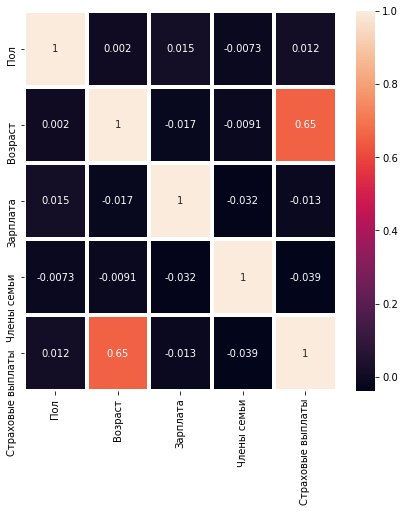

In [8]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(data.corr(), annot=True, linewidths=3, linecolor='white')

<div class="alert alert-info"> <b>Комментарий студента:</b> 

- Пропусков, дубликатов нет, данные выглядят нормально.

    
</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится.

**Обоснование:** 

Уравнение линейной регрессии имеет вид:
$f(w,X) = X \vec{w}$

Обозначим значения целевых показателей (все $y_i$) за вектор $\vec{y}$ размерностью $(n \times 1)$:
$\vec{y} = \begin{pmatrix} y_{0} \\ y_{1} \\ ... \\ y_{n} \end{pmatrix} \qquad$

Теперь мы можем записать в матричном формате уравнение оценки качества линейной модели:
$Err = (X \vec{w} - \vec{y})^2\rightarrow min$

Раскроем скобки:

$(X \vec{w} - \vec{y})^2 = (X \vec{w} - \vec{y})^T(X \vec{w} - \vec{y})$

$=(X\vec{w})^TX\vec{w} - \vec{y}^TX\vec{w} - (X\vec{w})^T\vec{y} + \vec{y}^T\vec{y}$

Подготовим уравнение для дифференцирования:

Перемножим матрицы $\vec{y}^TX\vec{w} = (X\vec{w})^T\vec{y} = \vec{w}^TX^T\vec{y}$

аналогичо $(X\vec{w})^TX\vec{w} = \vec{w}^TX^TX\vec{w}$

На выходе получаем уравнение, которое нам предстоит продифференцировать:
$Err = \vec{w}^TX^TX\vec{w} - 2\vec{w}^TX^T\vec{y} + \vec{y}^T\vec{y}$

Продифференцируем по вектору $\vec{w}$:

$\frac{d(\vec{w}^TX^TX\vec{w} - 2\vec{w}^TX^T\vec{y} + \vec{y}^T\vec{y})}{d\vec{w}}$

$(\vec{w}^TX^TX\vec{w})' - (2\vec{w}^TX^T\vec{y})' + (\vec{y}^T\vec{y})' = 0$

$2X^TX\vec{w} - 2X^T\vec{y} + 0 = 0$

$X^TX\vec{w}=X^T\vec{y}$


<div class="alert alert-info"> <b>Комментарий студента:</b> 

Вывод:    
- После произведения получим аналогичную формулу предсказаний, что и была в начале, значит домножение признаков на обратимую матрицу не влияет на предсказания модели.

    
</div>

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$
$$
w' = P^{-1}w
$$

<div class="alert alert-info"> <b>Комментарий студентаV2:</b>   
    
Да, можно использовать свойство обратной матрицы
    
$(A B)^{-1} =B^{-1} A^{-1}$    
    
$(A B)^{T} =B^{T} A^{T}$       
    
$A A^{-1}=E$
    
$A E=E A=A$
    
Но обратная матрица может браться только от квадратной матрицы, то для раскрытия скобок данного произведения нам надо сгруппировать его множители так, чтобы они были квадратными матрицами, используя свойство сочитаемости $A(BC) = (AB)C$.
    
По этому показалось что через уравнение среднеквадратичной ошибки проще.
    
</div>

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем умножение обучающих признаков X на случайную обратимую матрицу P. Создадим модель линейной регрессии до преобразования и посчитаем метрику R2. Далее умножим исходные признаки на обратимую матрицу и на основе полученных значений вновь посчитаем метрику R2. Метрики R2 по итогу должны быть равны.

**Обоснование**

Как было показано в предыдущем пункте, умножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому R2 равны.

## Проверка алгоритма

Выделим обучающие признаки, целевой признак, матрицу для умножения, обучающие признаки после умножения. Проведем обучение с помощью алгоритма линейной регрессии для признаков до умножения и после. Сделаем в каждом случае предсказания и определим метрики r2.

In [9]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
print(features.shape)
print(target.shape)

(4847, 4)
(4847,)


In [10]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
R2 = r2_score(target, predictions)
print(f'Метрика R2 : {R2:.2f}')

Метрика R2 : 0.43


In [26]:
# Создадим обратную матрицу
det = 0
w = 0
while det == 0:
    w = np.random.normal(size=(4, 4))
    det = np.linalg.det(w)
w

array([[-1.36440011,  0.79349295, -0.40343924,  0.50143131],
       [ 0.35580765, -0.2498787 , -0.53791584,  1.46923099],
       [ 0.5041208 , -1.01261472,  1.87002566,  1.26672569],
       [-1.58596571,  1.28041904, -0.97827024, -0.93323222]])

In [12]:
# Умножим признаки на обратную матрицу
new_features = features @ w
new_features

,0,1,2,3
0,"-38,155.47","13,550.37","16,136.31","47,964.79"
1,"-29,207.95","10,367.76","12,357.82","36,755.17"
2,"-16,135.89","5,725.68","6,828.34","20,313.92"
3,"-32,097.24","11,406.85","13,570.08","40,316.89"
4,"-20,068.85","7,123.28","8,489.23","25,243.61"
...,...,...,...,...
4995,"-27,463.29","9,755.89","11,614.34","34,522.00"
4996,"-40,321.98","14,325.33","17,050.09","50,665.76"
4997,"-26,088.76","9,270.55","11,030.78","32,777.52"
4998,"-25,162.45","8,939.57","10,639.25","31,620.49"


In [13]:
# Обучим модель с новыми признаками
model.fit(new_features, target)
predictions = model.predict(new_features)
R2 = r2_score(target, predictions)
print(f'Метрика R2 : {R2:.2f}')

Метрика R2 : 0.43


<div class="alert alert-info"> <b>Комментарий студента:</b> 

Вывод:    
- Так как метрики R2 одинаковые, преобразование исходных данных в случайную обратную матрицу возможно для шифрование данных клиентов.

    
</div>

<div class="alert alert-info"> <b>Комментарий студентаV2:</b> 

Спасибо за комментарии и за функцию(очень удобно) =) 
    
Для меня это все новое, информации море.

    
</div>